In [4]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(dpi=150)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [3]:
# importing and preparing the dataset
!wget --load-cookies /tmp/data_lab.zip "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/data_lab.zip --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xQEYahKo2RQIo8MW9MVHh7EPru8YFuV1' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xQEYahKo2RQIo8MW9MVHh7EPru8YFuV1" -O data_lab.zip && rm -rf /tmp/data_lab.zip

print('Unzipping folder... this may take a few minutes without output. Be patient.')
with zipfile.ZipFile('data_lab.zip', 'r') as zip_ref:
    zip_ref.extractall('data_lab')

path_data = '/content/data_lab/data_lab'
train_dir = os.path.join(path_data, 'train')
validation_dir = os.path.join(path_data, 'valid')
test_dir = os.path.join(path_data, 'test')
print('Directories in unzipped folder:', os.listdir(path_data))


train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(598, 598))
class_names = train_dataset.class_names

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=32,
                                                  image_size=(598, 598))

test_dataset = image_dataset_from_directory(test_dir,
                                            shuffle=True,
                                            batch_size=32,
                                            image_size=(598, 598))

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE).repeat()
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE).repeat()
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

--2023-11-15 16:08:30--  https://docs.google.com/uc?export=download&confirm=t&id=1xQEYahKo2RQIo8MW9MVHh7EPru8YFuV1
Resolving docs.google.com (docs.google.com)... 108.177.119.100, 108.177.119.139, 108.177.119.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gppg5fng9jd528gkqred7jfqhtme442k/1700064450000/13525664275705142765/*/1xQEYahKo2RQIo8MW9MVHh7EPru8YFuV1?e=download&uuid=a3913570-ecd6-4dc7-97b4-1e8de1260377 [following]
--2023-11-15 16:08:31--  https://doc-04-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gppg5fng9jd528gkqred7jfqhtme442k/1700064450000/13525664275705142765/*/1xQEYahKo2RQIo8MW9MVHh7EPru8YFuV1?e=download&uuid=a3913570-ecd6-4dc7-97b4-1e8de1260377
Resolving doc-04-48-docs.googleusercontent.com (doc-04-48-docs.googleusercontent.com)... 108.177.127.

In [5]:
# class labels name
print(class_names)


['high', 'low']
Number of samples with gleason grade high: 97
Number of samples with gleason grade low: 38


In [29]:
# !mkdir /content/data_lab/data_lab/train_copy
# !cp -r /content/data_lab/data_lab/train/ /content/data_lab/data_lab/train_copy/

# grade_low_dirs = os.listdir('/content/data_lab/data_lab/train_copy/train/low')
# # grade_low_dirs
# for dir in grade_low_dirs[:18]:
#   path_to_dir = os.path.join('/content/data_lab/data_lab/train_copy/train/low/', dir)
#   # print(path_to_dir)




In [11]:
# Create the base model from the pre-trained model or with randomly initialised weights in MobileNet V2 architecture
tranfer_learning = False
if tranfer_learning:
  base_model = tf.keras.applications.MobileNetV2(input_shape=None,
                                               include_top=False,
                                               weights='imagenet')

else:
  base_model = tf.keras.applications.MobileNetV2(input_shape=None,
                                                 include_top=False,
                                                 weights=None)

base_model.trainable = True

inputs = tf.keras.Input(shape=(598, 598, 3))
# x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune only last 20% of layers
fine_tune_at = int(0.8*len(base_model.layers))

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

learning_rate = 0.000001

loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()


Number of layers in the base model:  154
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 598, 598, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 598, 598, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLam  (None, 598, 598, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_3 (TFOpLa  (None, 598, 598, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_None (Fun  (None, None, None, 1280   2257984   
 ctional)                    )                                   
                  

Epoch 1/20
25/25 [==============================] - 44s 1s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.4656
Epoch 2/20
25/25 [==============================] - 31s 1s/step - loss: 0.6931 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.4663
Epoch 3/20
25/25 [==============================] - 31s 1s/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5394
Epoch 4/20
25/25 [==============================] - 31s 1s/step - loss: 0.6931 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5331
Epoch 5/20
25/25 [==============================] - 31s 1s/step - loss: 0.6931 - accuracy: 0.4925 - val_loss: 0.6931 - val_accuracy: 0.5281
Epoch 6/20
25/25 [==============================] - 30s 1s/step - loss: 0.6931 - accuracy: 0.4762 - val_loss: 0.6931 - val_accuracy: 0.4638
Epoch 7/20
25/25 [==============================] - 31s 1s/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6931 - val_accuracy: 0.4631
Epoch 8/20
25/25 [==

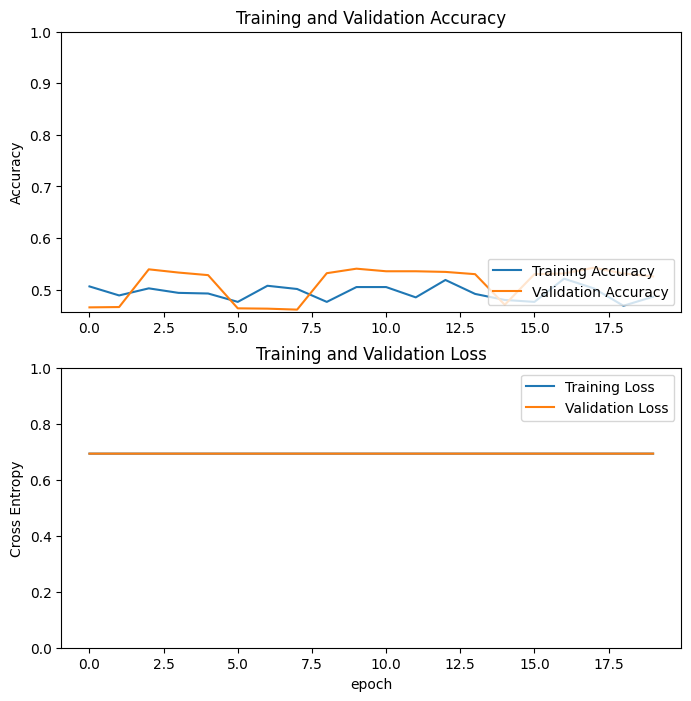

In [12]:
history = model.fit(train_dataset,
                    steps_per_epoch=25,
                    validation_steps=50,
                    epochs=10,
                    validation_data=validation_dataset)

plot_history(history)


You can observe the model did not learn anything with random initalisation of the weights. A lot of data is required to fine tune all the millions of parameters (Note: here we only fine tune the last 20% of the layers of the network so we did not optimise much in the 80% of the network).

Try running the model fitting with transfer learning where the pretrained model fitted on the Imagenet dataset is used to fine tune on the pathology images (same as the lab 1)

In [ ]:
# Create the base model from the pre-trained model or with randomly initialised weights in MobileNet V2 architecture
tranfer_learning =

if tranfer_learning:
  base_model = tf.keras.applications.MobileNetV2(input_shape=None,
                                               include_top=False,
                                               weights='imagenet')

else:
  base_model = tf.keras.applications.MobileNetV2(input_shape=None,
                                                 include_top=False,
                                                 weights=None)

base_model.trainable = True

inputs = tf.keras.Input(shape=(598, 598, 3))
# x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune only last 20% of layers
fine_tune_at = int(0.8*len(base_model.layers))

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

learning_rate = 0.000001

loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

history = model.fit(train_dataset,
                    steps_per_epoch=25,
                    validation_steps=50,
                    epochs=10,
                    validation_data=validation_dataset)

plot_history(history)

Next we will work on a strategy to deal with the class imbalance problem.

In [ ]:
## looking at the number of images from each class in the training data
print('Number of samples with gleason grade high: {}'.format(len(os.listdir('/content/data_lab/data_lab/train/high/'))))
print('Number of samples with gleason grade low: {}'.format(len(os.listdir('/content/data_lab/data_lab/train/low/'))))
# applying class weights during model training
neg = len(os.listdir('/content/data_lab/data_lab/train/low/'))
pos = len(os.listdir('/content/data_lab/data_lab/train/high/'))
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class low: {:.2f}'.format(weight_for_0))
print('Weight for class high: {:.2f}'.format(weight_for_1))

We will introduce class weights during the model training so the it takes into account the ratio of class imbalance while calculating the evaluation metric (i.e. accuracy) during the model training

In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=25,
                    validation_steps=50,
                    epochs=20,
                    validation_data=validation_dataset,
                    class_weight=class_weight)

plot_history(history)

What changes did you observe in the model learning curves?

In [ ]:
# defining data augmentation, potentially can add more different ones
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

# Create the base model from the pre-trained model or with randomly initialised weights in MobileNet V2 architecture
tranfer_learning = False
if tranfer_learning:
  base_model = tf.keras.applications.MobileNetV2(input_shape=None,
                                               include_top=False,
                                               weights='imagenet')

else:
  base_model = tf.keras.applications.MobileNetV2(input_shape=None,
                                                 include_top=False,
                                                 weights=None)

base_model.trainable = True

inputs = tf.keras.Input(shape=(598, 598, 3))
# x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune only last 20% of layers
fine_tune_at = int(0.8*len(base_model.layers))

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

learning_rate = 0.000001

loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()



In [ ]:
# introducing callbacks and earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(train_dataset,
                    steps_per_epoch=25,
                    validation_steps=10,
                    epochs=20,
                    validation_data=validation_dataset,
                    callbacks=[callback],
                    verbose=1)

plot_history(history)